# AI-Powered Battery Heating Predictions for Next-Generation Electric Vehicles

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
=
import warnings
warnings.filterwarnings('ignore')
import joblib
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [2]:
data = pd.read_csv("Datasets\Overview.csv", encoding="latin1")
data

,Trip,Date,Route/Area,Weather,Battery Temperature (Start) [°C],Battery Temperature (End),Battery State of Charge (Start),Battery State of Charge (End),Unnamed: 8,Ambient Temperature (Start) [°C],Target Cabin Temperature,Distance [km],Duration [min],Unnamed: 13,Fan,Note
0,TripA01,2019-06-25_13-21-14,Munich East,sunny,21.0,22.0,86.3%,80.3%,6.0%,25.5,23.0,7.43,16.82,NaN,"Automatic, Level 1",NaN
1,TripA02,2019-06-25_14-05-31,Munich East,sunny,23.0,26.0,80.3%,67.3%,13.0%,32.0,23.0,23.51,23.55,NaN,"Automatic, Level 1",Target Cabin Temperature changed
2,TripA03,2019-06-28_10-02-15,Munich East,sunny,24.0,25.0,83.5%,75.1%,8.4%,21.5,27.0,12.82,11.18,NaN,"Automatic, Level 1",Target Cabin Temperature changed
3,TripA04,2019-06-28_10-13-30,Munich East,sunny,25.0,27.0,75.1%,66.7%,8.4%,24.0,22.0,10.73,6.87,NaN,"Automatic, Level 1",NaN
4,TripA05,2019-06-28_10-20-26,Munich East,sunny,27.0,27.0,66.7%,60.2%,6.5%,24.5,24.0,12.39,22.78,NaN,"Automatic, Level 1",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,TripB35,2020-01-14_17-59-06,Munich North,dark,11.0,13.0,85.4%,71.5%,13.9%,4.0,22.0,15.42,22.71,NaN,"Automatic, Level 1",NaN
69,TripB36,2020-01-15_10-43-44,Munich North,sunny,6.0,10.0,72.1%,44.5%,27.6%,4.0,22.0,38.72,47.54,NaN,"Automatic, Level 1",Open door at 37:10 and 42:00 for 30s
70,TripB37,2020-01-21_09-15-20,Munich East,slightly cloudy,8.0,10.0,83.8%,68.0%,15.8%,-3.0,22.0,17.46,23.62,NaN,"Automatic, Level 1",NaN
71,TripB38,2020-02-07_09-32-02,FTMRoute reverse,sunny,-1.0,3.0,65.0%,48.8%,16.2%,-1.5,22.0,18.90,27.38,NaN,"Automatic, Level 1",Rush Hour


In [3]:
data.size

1168

In [4]:
data.shape

(73, 16)

In [5]:
data.columns

Index(['Trip', 'Date', 'Route/Area', 'Weather',
       'Battery Temperature (Start) [°C]', 'Battery Temperature (End)',
       'Battery State of Charge (Start)', 'Battery State of Charge (End)',
       'Unnamed: 8', 'Ambient Temperature (Start) [°C]',
       'Target Cabin Temperature', 'Distance [km]', 'Duration [min]',
       'Unnamed: 13', 'Fan', 'Note'],
      dtype='object')

In [6]:
data.head()

,Trip,Date,Route/Area,Weather,Battery Temperature (Start) [°C],Battery Temperature (End),Battery State of Charge (Start),Battery State of Charge (End),Unnamed: 8,Ambient Temperature (Start) [°C],Target Cabin Temperature,Distance [km],Duration [min],Unnamed: 13,Fan,Note
0,TripA01,2019-06-25_13-21-14,Munich East,sunny,21.0,22.0,86.3%,80.3%,6.0%,25.5,23.0,7.43,16.82,NaN,"Automatic, Level 1",NaN
1,TripA02,2019-06-25_14-05-31,Munich East,sunny,23.0,26.0,80.3%,67.3%,13.0%,32.0,23.0,23.51,23.55,NaN,"Automatic, Level 1",Target Cabin Temperature changed
2,TripA03,2019-06-28_10-02-15,Munich East,sunny,24.0,25.0,83.5%,75.1%,8.4%,21.5,27.0,12.82,11.18,NaN,"Automatic, Level 1",Target Cabin Temperature changed
3,TripA04,2019-06-28_10-13-30,Munich East,sunny,25.0,27.0,75.1%,66.7%,8.4%,24.0,22.0,10.73,6.87,NaN,"Automatic, Level 1",NaN
4,TripA05,2019-06-28_10-20-26,Munich East,sunny,27.0,27.0,66.7%,60.2%,6.5%,24.5,24.0,12.39,22.78,NaN,"Automatic, Level 1",NaN


In [7]:
data.isnull().sum()

Trip                                 3
Date                                 3
Route/Area                           3
Weather                              3
Battery Temperature (Start) [°C]     3
Battery Temperature (End)            3
Battery State of Charge (Start)      3
Battery State of Charge (End)        3
Unnamed: 8                           3
Ambient Temperature (Start) [°C]     3
Target Cabin Temperature             3
Distance [km]                        3
Duration [min]                       3
Unnamed: 13                         73
Fan                                  3
Note                                47
dtype: int64

In [8]:
# Fill numerical columns with mean
data.fillna(data.mean(numeric_only=True), inplace=True)

# Fill categorical columns with the most frequent value (mode)
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)


In [9]:
data.isnull().sum()

Trip                                 0
Date                                 0
Route/Area                           0
Weather                              0
Battery Temperature (Start) [°C]     0
Battery Temperature (End)            0
Battery State of Charge (Start)      0
Battery State of Charge (End)        0
Unnamed: 8                           0
Ambient Temperature (Start) [°C]     0
Target Cabin Temperature             0
Distance [km]                        0
Duration [min]                       0
Unnamed: 13                         73
Fan                                  0
Note                                 0
dtype: int64

In [10]:
data.drop(columns = 'Unnamed: 13',inplace = True)

In [11]:
data.isnull().sum()

Trip                                0
Date                                0
Route/Area                          0
Weather                             0
Battery Temperature (Start) [°C]    0
Battery Temperature (End)           0
Battery State of Charge (Start)     0
Battery State of Charge (End)       0
Unnamed: 8                          0
Ambient Temperature (Start) [°C]    0
Target Cabin Temperature            0
Distance [km]                       0
Duration [min]                      0
Fan                                 0
Note                                0
dtype: int64

In [12]:
data

,Trip,Date,Route/Area,Weather,Battery Temperature (Start) [°C],Battery Temperature (End),Battery State of Charge (Start),Battery State of Charge (End),Unnamed: 8,Ambient Temperature (Start) [°C],Target Cabin Temperature,Distance [km],Duration [min],Fan,Note
0,TripA01,2019-06-25_13-21-14,Munich East,sunny,21.000000,22.000000,86.3%,80.3%,6.0%,25.500000,23.000000,7.430000,16.820000,"Automatic, Level 1",Rush Hour
1,TripA02,2019-06-25_14-05-31,Munich East,sunny,23.000000,26.000000,80.3%,67.3%,13.0%,32.000000,23.000000,23.510000,23.550000,"Automatic, Level 1",Target Cabin Temperature changed
2,TripA03,2019-06-28_10-02-15,Munich East,sunny,24.000000,25.000000,83.5%,75.1%,8.4%,21.500000,27.000000,12.820000,11.180000,"Automatic, Level 1",Target Cabin Temperature changed
3,TripA04,2019-06-28_10-13-30,Munich East,sunny,25.000000,27.000000,75.1%,66.7%,8.4%,24.000000,22.000000,10.730000,6.870000,"Automatic, Level 1",Rush Hour
4,TripA05,2019-06-28_10-20-26,Munich East,sunny,27.000000,27.000000,66.7%,60.2%,6.5%,24.500000,24.000000,12.390000,22.780000,"Automatic, Level 1",Rush Hour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,TripB35,2020-01-14_17-59-06,Munich North,dark,11.000000,13.000000,85.4%,71.5%,13.9%,4.000000,22.000000,15.420000,22.710000,"Automatic, Level 1",Rush Hour
69,TripB36,2020-01-15_10-43-44,Munich North,sunny,6.000000,10.000000,72.1%,44.5%,27.6%,4.000000,22.000000,38.720000,47.540000,"Automatic, Level 1",Open door at 37:10 and 42:00 for 30s
70,TripB37,2020-01-21_09-15-20,Munich East,slightly cloudy,8.000000,10.000000,83.8%,68.0%,15.8%,-3.000000,22.000000,17.460000,23.620000,"Automatic, Level 1",Rush Hour
71,TripB38,2020-02-07_09-32-02,FTMRoute reverse,sunny,-1.000000,3.000000,65.0%,48.8%,16.2%,-1.500000,22.000000,18.900000,27.380000,"Automatic, Level 1",Rush Hour


In [13]:
data.Weather.unique()

array(['sunny', 'slightly cloudy', 'rainy', 'cloudy',
       'dark, little rainy', 'dark', 'sunrise', 'sunset'], dtype=object)

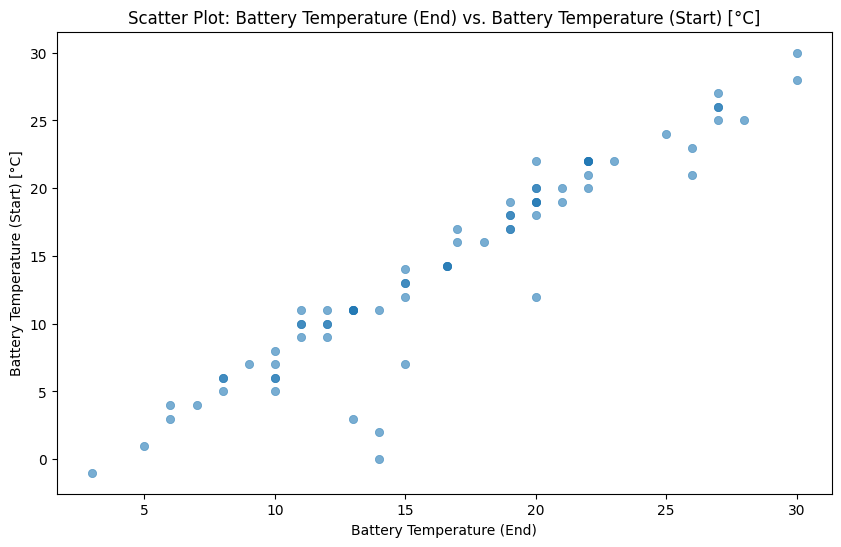

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Battery Temperature (End)'], y=data['Battery Temperature (Start) [°C]'], alpha=0.6, edgecolor=None)

# Add labels and title
plt.xlabel("Battery Temperature (End)")
plt.ylabel("Battery Temperature (Start) [°C]")
plt.title("Scatter Plot: Battery Temperature (End) vs. Battery Temperature (Start) [°C]")

# Show plot
plt.show()

<AxesSubplot:>

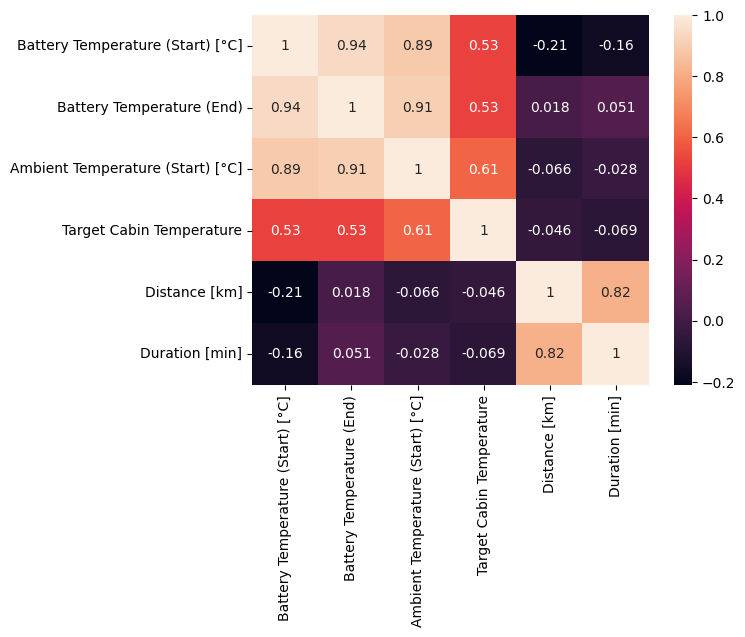

In [15]:
sns.heatmap(data.select_dtypes(include = 'number').corr(), annot = True)

<AxesSubplot:>

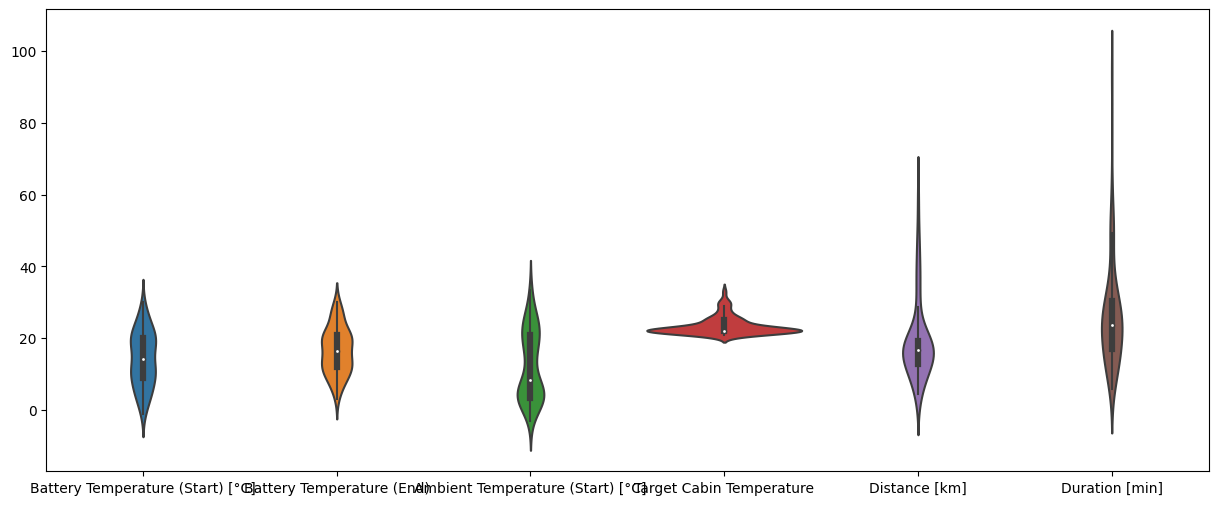

In [16]:
plt.figure(figsize = (15,6))
sns.violinplot(data = data)

In [17]:
data = data.drop(['Unnamed: 8', 'Date'], axis = 1)
data

,Trip,Route/Area,Weather,Battery Temperature (Start) [°C],Battery Temperature (End),Battery State of Charge (Start),Battery State of Charge (End),Ambient Temperature (Start) [°C],Target Cabin Temperature,Distance [km],Duration [min],Fan,Note
0,TripA01,Munich East,sunny,21.000000,22.000000,86.3%,80.3%,25.500000,23.000000,7.430000,16.820000,"Automatic, Level 1",Rush Hour
1,TripA02,Munich East,sunny,23.000000,26.000000,80.3%,67.3%,32.000000,23.000000,23.510000,23.550000,"Automatic, Level 1",Target Cabin Temperature changed
2,TripA03,Munich East,sunny,24.000000,25.000000,83.5%,75.1%,21.500000,27.000000,12.820000,11.180000,"Automatic, Level 1",Target Cabin Temperature changed
3,TripA04,Munich East,sunny,25.000000,27.000000,75.1%,66.7%,24.000000,22.000000,10.730000,6.870000,"Automatic, Level 1",Rush Hour
4,TripA05,Munich East,sunny,27.000000,27.000000,66.7%,60.2%,24.500000,24.000000,12.390000,22.780000,"Automatic, Level 1",Rush Hour
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,TripB35,Munich North,dark,11.000000,13.000000,85.4%,71.5%,4.000000,22.000000,15.420000,22.710000,"Automatic, Level 1",Rush Hour
69,TripB36,Munich North,sunny,6.000000,10.000000,72.1%,44.5%,4.000000,22.000000,38.720000,47.540000,"Automatic, Level 1",Open door at 37:10 and 42:00 for 30s
70,TripB37,Munich East,slightly cloudy,8.000000,10.000000,83.8%,68.0%,-3.000000,22.000000,17.460000,23.620000,"Automatic, Level 1",Rush Hour
71,TripB38,FTMRoute reverse,sunny,-1.000000,3.000000,65.0%,48.8%,-1.500000,22.000000,18.900000,27.380000,"Automatic, Level 1",Rush Hour


In [18]:
data['Battery State of Charge (Start)'] = data['Battery State of Charge (Start)'].str.rstrip('%').astype(float)
data['Battery State of Charge (End)'] = data['Battery State of Charge (End)'].str.rstrip('%').astype(float)


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Trip                              73 non-null     object 
 1   Route/Area                        73 non-null     object 
 2   Weather                           73 non-null     object 
 3   Battery Temperature (Start) [°C]  73 non-null     float64
 4   Battery Temperature (End)         73 non-null     float64
 5   Battery State of Charge (Start)   73 non-null     float64
 6   Battery State of Charge (End)     73 non-null     float64
 7   Ambient Temperature (Start) [°C]  73 non-null     float64
 8   Target Cabin Temperature          73 non-null     float64
 9   Distance [km]                     73 non-null     float64
 10  Duration [min]                    73 non-null     float64
 11  Fan                               73 non-null     object 
 12  Note      

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])


data.head()


,Trip,Route/Area,Weather,Battery Temperature (Start) [°C],Battery Temperature (End),Battery State of Charge (Start),Battery State of Charge (End),Ambient Temperature (Start) [°C],Target Cabin Temperature,Distance [km],Duration [min],Fan,Note
0,0,4,5,21.0,22.0,86.3,80.3,25.5,23.0,7.43,16.82,0,11
1,1,4,5,23.0,26.0,80.3,67.3,32.0,23.0,23.51,23.55,0,14
2,2,4,5,24.0,25.0,83.5,75.1,21.5,27.0,12.82,11.18,0,14
3,3,4,5,25.0,27.0,75.1,66.7,24.0,22.0,10.73,6.87,0,11
4,4,4,5,27.0,27.0,66.7,60.2,24.5,24.0,12.39,22.78,0,11


In [21]:
data.Trip.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69])

In [22]:
X = data.drop(['Battery Temperature (End)'],axis=1)
X

,Trip,Route/Area,Weather,Battery Temperature (Start) [°C],Battery State of Charge (Start),Battery State of Charge (End),Ambient Temperature (Start) [°C],Target Cabin Temperature,Distance [km],Duration [min],Fan,Note
0,0,4,5,21.000000,86.3,80.3,25.500000,23.000000,7.430000,16.820000,0,11
1,1,4,5,23.000000,80.3,67.3,32.000000,23.000000,23.510000,23.550000,0,14
2,2,4,5,24.000000,83.5,75.1,21.500000,27.000000,12.820000,11.180000,0,14
3,3,4,5,25.000000,75.1,66.7,24.000000,22.000000,10.730000,6.870000,0,11
4,4,4,5,27.000000,66.7,60.2,24.500000,24.000000,12.390000,22.780000,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
68,66,5,1,11.000000,85.4,71.5,4.000000,22.000000,15.420000,22.710000,0,11
69,67,5,5,6.000000,72.1,44.5,4.000000,22.000000,38.720000,47.540000,0,10
70,68,4,4,8.000000,83.8,68.0,-3.000000,22.000000,17.460000,23.620000,0,11
71,69,2,5,-1.000000,65.0,48.8,-1.500000,22.000000,18.900000,27.380000,0,11


In [23]:
y = data['Battery Temperature (End)']
y

0     22.000000
1     26.000000
2     25.000000
3     27.000000
4     27.000000
        ...    
68    13.000000
69    10.000000
70    10.000000
71     3.000000
72    16.585714
Name: Battery Temperature (End), Length: 73, dtype: float64

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
# Define empty lists to store metrics
mse_list = []
mae_list = []
r2_list = []
# Function to calculate various metrics such as accuracy, precision etc
def calculatemetrics(algorithm, predict, testY):
    #testY = testY.astype('int')
    #predict = predict.astype('int')
    
    mse = mean_squared_error(testY, predict)
    mae = mean_absolute_error(testY, predict)
    r2 = r2_score(testY, predict) * 100
    
    # Append calculated metrics to lists
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)
    
    print(algorithm + ' Mean Squared Error: ' + str(mse))
    print(algorithm + ' Mean Absolute Error: ' + str(mae))
    print(algorithm + ' R^2 Score: ' + str(r2))
    
    # Ensure that you are working with numpy arrays
    testY = np.array(testY)
    predict = np.array(predict)

    # Create a scatter plot
    plt.figure(figsize=(8, 8))
    plt.scatter(predict, testY,color='blue')
    plt.plot([np.min(testY), np.max(testY)], [np.min(testY), np.max(testY)], linestyle='--', color='red', lw=2)
    # Set labels and title
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Regression Performance')
    plt.show()


Linear Regression with Noise - MSE: 2.5967654709492036
Linear Regression with Noise - MAE: 1.0942126540276909
Linear Regression with Noise - R² Score: 94.1807724061155%


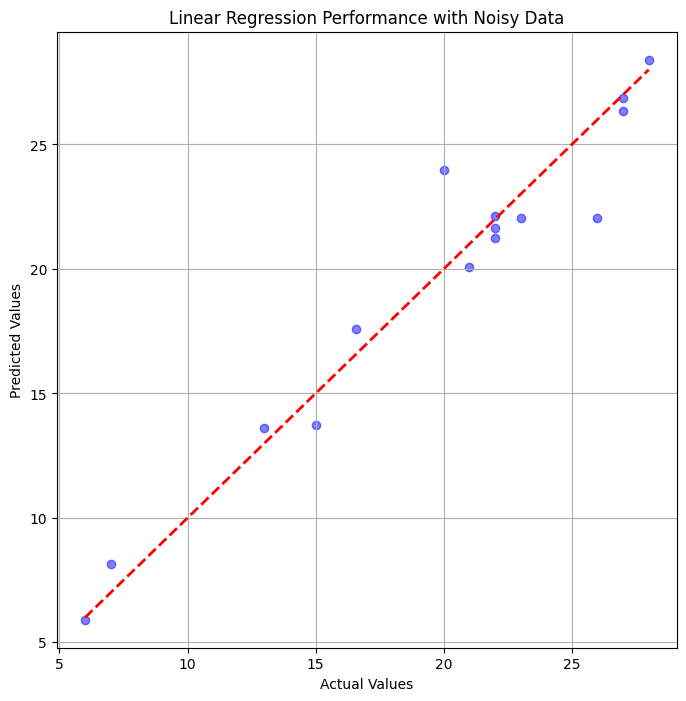

In [26]:
# Add Gaussian noise to the training data
noise_factor = 0.9  # Adjust noise level
X_train_noisy = X_train + np.random.normal(0, noise_factor, X_train.shape)
X_test_noisy = X_test + np.random.normal(0, noise_factor, X_test.shape)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model with noisy data
lr_model.fit(X_train_noisy, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_noisy)

# Calculate metricsmse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr) * 100

# Print the metrics
print(f"Linear Regression with Noise - MSE: {mse_lr}")
print(f"Linear Regression with Noise - MAE: {mae_lr}")
print(f"Linear Regression with Noise - R² Score: {r2_lr}%")

# Plot the results
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], linestyle='--', color='red', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression Performance with Noisy Data")
plt.grid(True)
plt.show()


Ridge Regression - MSE: 2.125682758047299
Ridge Regression - MAE: 1.0058135504563006
Ridge Regression - R² Score: 95.23644630219464%


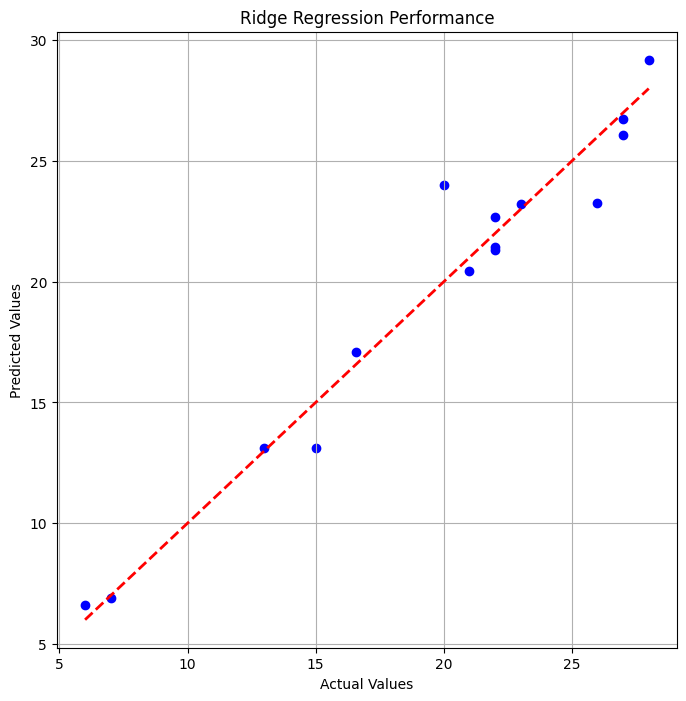

In [27]:
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha value for regularization strength

# Train the model
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Calculate metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge) * 100

# Print the metrics
print(f"Ridge Regression - MSE: {mse_ridge}")
print(f"Ridge Regression - MAE: {mae_ridge}")
print(f"Ridge Regression - R² Score: {r2_ridge}%")

# Plot the results
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_ridge, color='blue')
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], linestyle='--', color='red', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression Performance")
plt.grid(True)
plt.show()

## Proposed Model Predication on Test data

In [28]:
test = pd.read_csv('Datasets/test.csv')
test

,Trip,Route/Area,Weather,Battery Temperature (Start) [°C],Battery State of Charge (Start),Battery State of Charge (End),Ambient Temperature (Start) [°C],Target Cabin Temperature,Distance [km],Duration [min],Fan,Note
0,57,5,4,12.0,33.4,21.2,5.5,22.0,14.70,13.42,0,11
1,25,4,4,19.0,86.2,78.8,22.0,30.0,18.03,26.87,0,11
2,62,5,1,6.0,72.1,57.8,3.5,22.0,15.24,18.28,0,11
3,18,4,4,22.0,88.5,80.4,23.5,30.0,16.73,26.46,0,11
4,60,5,0,11.0,31.5,15.4,3.5,22.0,15.83,16.14,0,12
5,63,5,0,4.0,52.6,38.1,2.0,22.0,14.24,13.26,0,11
6,37,5,1,11.0,83.2,69.3,6.0,22.0,16.58,22.53,0,11
7,34,0,5,9.0,67.4,50.4,3.5,22.0,19.40,26.32,0,12
8,39,7,0,7.0,67.3,44.0,3.5,22.0,32.22,48.57,0,11
9,12,4,5,22.0,85.5,82.9,21.0,23.0,4.57,11.93,0,11


In [29]:
pred = ridge_model.predict(test)
pred

array([13.67097994, 20.50818709,  8.35649902, 22.69764218, 12.58880544,
        6.88416551, 13.04313411, 12.12692131, 12.29381484, 21.32386372,
       18.77927777, 12.32249893])

In [30]:
test['prediction'] = pred
test

,Trip,Route/Area,Weather,Battery Temperature (Start) [°C],Battery State of Charge (Start),Battery State of Charge (End),Ambient Temperature (Start) [°C],Target Cabin Temperature,Distance [km],Duration [min],Fan,Note,prediction
0,57,5,4,12.0,33.4,21.2,5.5,22.0,14.70,13.42,0,11,13.670980
1,25,4,4,19.0,86.2,78.8,22.0,30.0,18.03,26.87,0,11,20.508187
2,62,5,1,6.0,72.1,57.8,3.5,22.0,15.24,18.28,0,11,8.356499
3,18,4,4,22.0,88.5,80.4,23.5,30.0,16.73,26.46,0,11,22.697642
4,60,5,0,11.0,31.5,15.4,3.5,22.0,15.83,16.14,0,12,12.588805
5,63,5,0,4.0,52.6,38.1,2.0,22.0,14.24,13.26,0,11,6.884166
6,37,5,1,11.0,83.2,69.3,6.0,22.0,16.58,22.53,0,11,13.043134
7,34,0,5,9.0,67.4,50.4,3.5,22.0,19.40,26.32,0,12,12.126921
8,39,7,0,7.0,67.3,44.0,3.5,22.0,32.22,48.57,0,11,12.293815
9,12,4,5,22.0,85.5,82.9,21.0,23.0,4.57,11.93,0,11,21.323864
